In [1]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
import os
import scipy.optimize as opt
import scipy.stats as st
import sklearn.manifold
import sklearn.model_selection

In [2]:
from sklearn import datasets
digits = datasets.load_digits()
print(digits.images.shape)
print(digits.keys())

print(digits.DESCR)

(1797, 8, 8)
dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into 

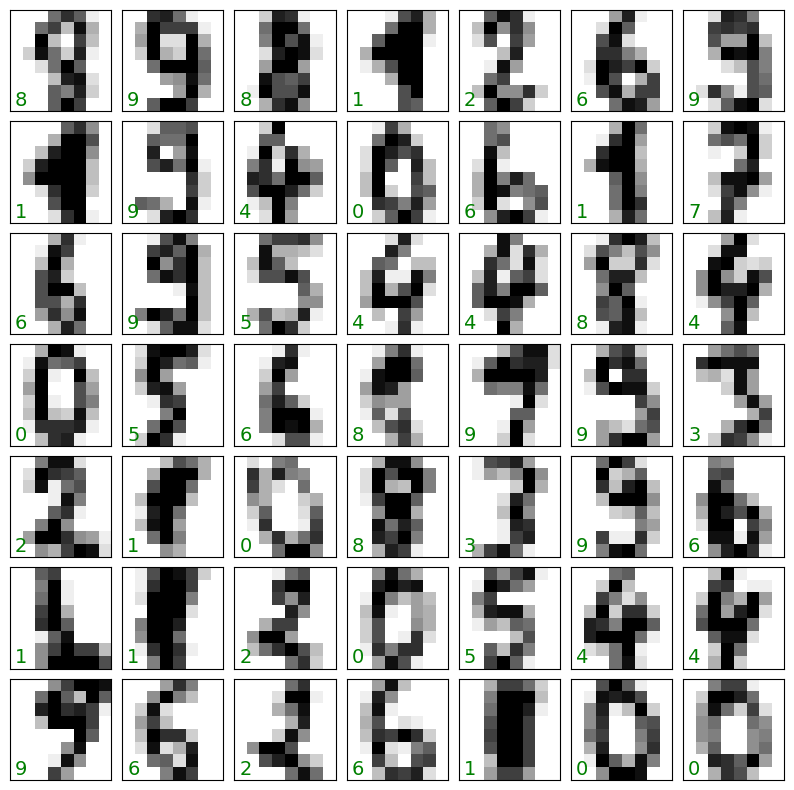

In [3]:
fig, axes = plt.subplots(7,7, figsize=(10, 10))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

np.random.seed(4321)
mychoices = np.random.choice(digits.images.shape[0],49)

for i, ax in enumerate(axes.flat):
    ax.imshow((digits.images[mychoices[i]]), 
              cmap='binary')
    ax.text(0.05, 0.05, str(digits.target[mychoices[i]]),transform=ax.transAxes, color='green', fontsize=14)
    ax.set_xticks([])
    ax.set_yticks([])
    

In [4]:
print(digits.data.shape)

# The images themselves
print(digits.images[0])

# The data for use in our algorithms
print(digits.data[0])

# The labels
print(digits.target)
print(digits.target[0])

(1797, 64)
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
[0 1 2 ... 8 9 8]
0


# Task 1: Dimensionality reduction with Isomap

c:\Users\marti\anaconda3\Lib\site-packages\sklearn\manifold\_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
c:\Users\marti\anaconda3\Lib\site-packages\scipy\sparse\_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


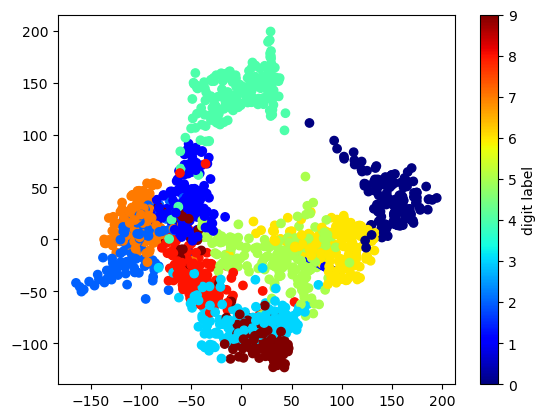

In [5]:
reduce = sklearn.manifold.Isomap(n_components=2)
X_transformed = reduce.fit_transform(digits.data)

plt.scatter(X_transformed[:,0], X_transformed[:,1], c=digits.target, cmap='jet')

# Add the color bar
plt.colorbar(label='digit label', ticks=range(10))

# Task 2: Supervised learning with LogisticRegression

In [6]:
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(digits.data, digits.target, test_size=0.2, train_size=0.8)

In [7]:
# train

import sklearn.linear_model
classifier = sklearn.linear_model.LogisticRegression(max_iter=2000, solver='sag')
classifier.fit(X_train, Y_train)
y_pred_train = classifier.predict(X_train)

import sklearn.metrics
accuracy = sklearn.metrics.accuracy_score(Y_train, y_pred_train)
print('train =', accuracy)

# test
y_pred_test = classifier.predict(X_test)
accuracy = sklearn.metrics.accuracy_score(Y_test, y_pred_test)
print('test =', accuracy)


train = 1.0
test = 0.9555555555555556


In [8]:
# confusion matrix
from sklearn.metrics import confusion_matrix
print('train confusion matrix')
print(confusion_matrix(Y_train, y_pred_train))

print('test confusion matrix')
print(confusion_matrix(Y_test, y_pred_test))

train confusion matrix
[[146   0   0   0   0   0   0   0   0   0]
 [  0 141   0   0   0   0   0   0   0   0]
 [  0   0 138   0   0   0   0   0   0   0]
 [  0   0   0 152   0   0   0   0   0   0]
 [  0   0   0   0 131   0   0   0   0   0]
 [  0   0   0   0   0 144   0   0   0   0]
 [  0   0   0   0   0   0 142   0   0   0]
 [  0   0   0   0   0   0   0 147   0   0]
 [  0   0   0   0   0   0   0   0 142   0]
 [  0   0   0   0   0   0   0   0   0 154]]
test confusion matrix
[[32  0  0  0  0  0  0  0  0  0]
 [ 0 40  0  0  0  0  0  0  0  1]
 [ 0  0 39  0  0  0  0  0  0  0]
 [ 0  0  0 28  0  3  0  0  0  0]
 [ 0  0  0  0 48  0  0  0  0  2]
 [ 0  1  0  0  0 36  0  1  0  0]
 [ 0  0  0  0  0  0 38  0  1  0]
 [ 0  0  0  1  0  0  0 31  0  0]
 [ 0  3  0  0  0  0  0  0 29  0]
 [ 0  0  0  1  0  0  0  0  2 23]]


C:\Users\marti\AppData\Local\Temp\ipykernel_14088\1925121340.py:1: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(confusion_matrix(Y_test, y_pred_test)), cmap='Blues', interpolation='nearest')


Text(0.5, 0, 'predicted')

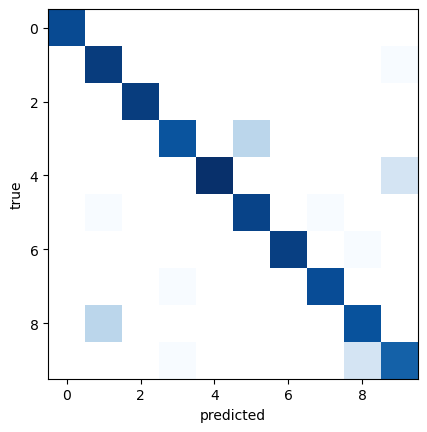

In [9]:
plt.imshow(np.log(confusion_matrix(Y_test, y_pred_test)), cmap='Blues', interpolation='nearest')
plt.ylabel('true')
plt.xlabel('predicted')

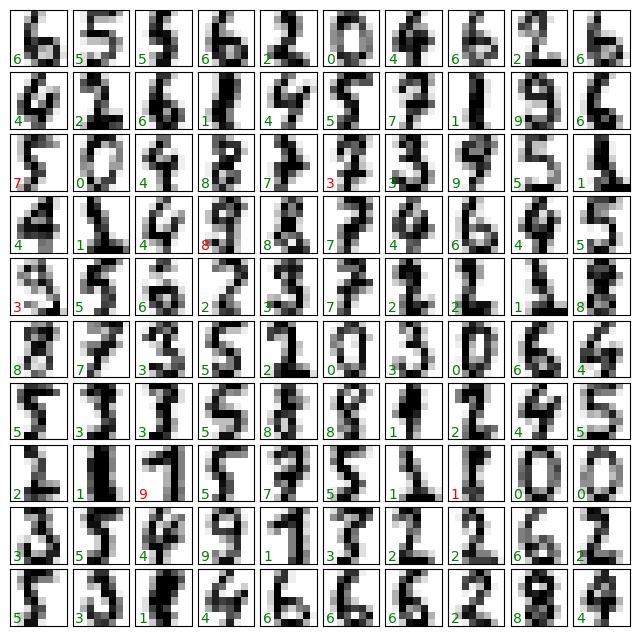

In [10]:
#results of the test

fig, axes = plt.subplots(10, 10, figsize=(8, 8))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i].reshape(8, 8), cmap='binary')
    ax.text(0.05, 0.05, str(y_pred_test[i]), transform=ax.transAxes, 
            color='green' if (Y_test[i] == y_pred_test[i]) else 'red')
    ax.set_xticks([])
    ax.set_yticks([])

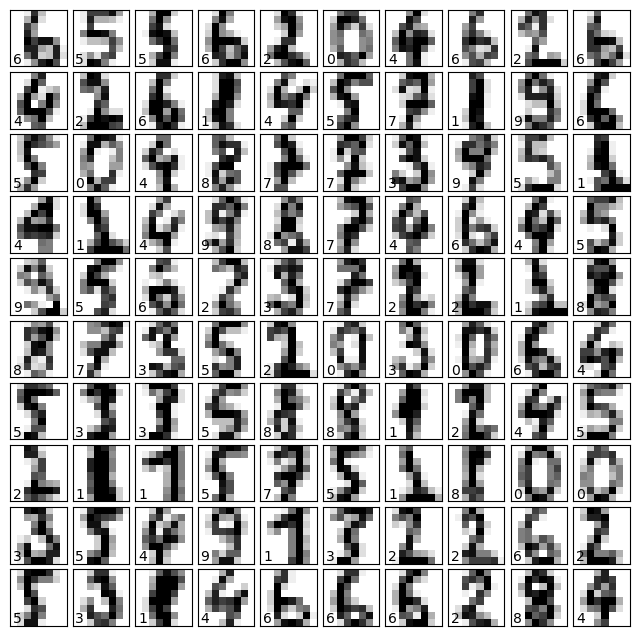

In [11]:
#real labels

fig, axes = plt.subplots(10, 10, figsize=(8, 8))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i].reshape(8, 8), cmap='binary')
    ax.text(0.05, 0.05, str(Y_test[i]), transform=ax.transAxes)
    ax.set_xticks([])
    ax.set_yticks([])

In [12]:
predchoice = classifier.predict(digits.data[mychoices])
confusion_matrix(digits.target[mychoices], predchoice)

array([[6, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 7, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 4, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 2, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 6, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 3, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 7, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 5, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 8]], dtype=int64)

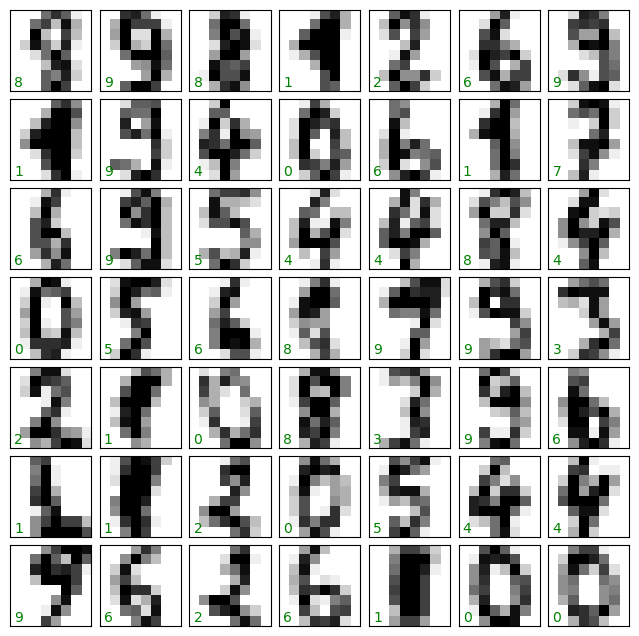

In [13]:
#results of the test

fig, axes = plt.subplots(7,7, figsize=(8, 8))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.data[mychoices[i]].reshape(8,8), cmap='binary')
    ax.text(0.05, 0.05, str(predchoice[i]), transform=ax.transAxes, 
            color='green' if (digits.target[mychoices[i]] == predchoice[i]) else 'red')
    ax.set_xticks([])
    ax.set_yticks([])

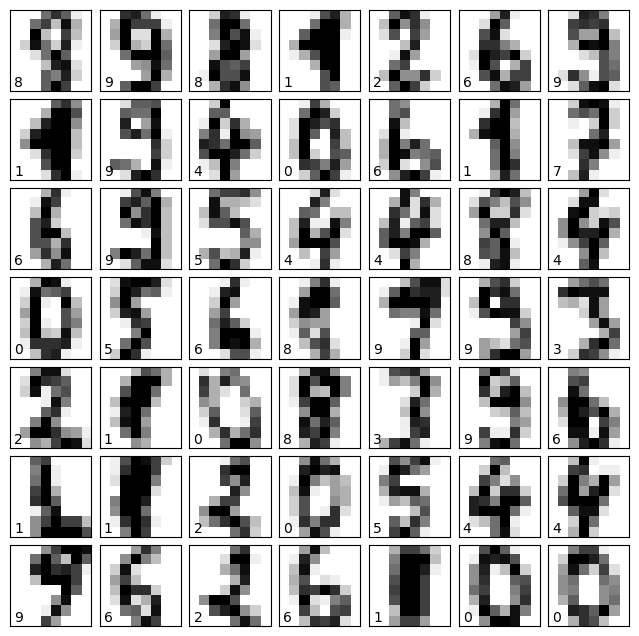

In [14]:
#real labels

fig, axes = plt.subplots(7, 7, figsize=(8, 8))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.data[mychoices[i]].reshape(8,8), cmap='binary')
    ax.text(0.05, 0.05, str(digits.target[mychoices[i]]), transform=ax.transAxes)
    ax.set_xticks([])
    ax.set_yticks([])

# Supervised Learning with LogisticRegression using the reduced dataset

In [15]:
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X_transformed, digits.target, test_size=0.2, train_size=0.8)

In [16]:
# train

import sklearn.linear_model
classifier = sklearn.linear_model.LogisticRegression(max_iter=2000, solver='sag')
classifier.fit(X_train, Y_train)
y_pred_train = classifier.predict(X_train)
import sklearn.metrics
accuracy = sklearn.metrics.accuracy_score(Y_train, y_pred_train)
print('train =', accuracy)

# test
y_pred_test = classifier.predict(X_test)
accuracy = sklearn.metrics.accuracy_score(Y_test, y_pred_test)
print('test =', accuracy)

train = 0.6889352818371608
test = 0.675


In [17]:
# confusion matrix
from sklearn.metrics import confusion_matrix
print('train confusion matrix')
print(confusion_matrix(Y_train, y_pred_train))

print('test confusion matrix')
print(confusion_matrix(Y_test, y_pred_test))

train confusion matrix
[[142   0   0   0   0   0   5   0   0   0]
 [  0 106   1   0   4   4  21  11   3   0]
 [  0   4  73   0   0   0   0  63   5   0]
 [  0   0   0  95   0   5   0   0  13  35]
 [  0   4   1   0 138   0   0   1   0   0]
 [  1  16   0   5   0  94  24   0   3   0]
 [  1   6   0   0   0  13 124   0   0   0]
 [  0   2  56   0   0   0   0  79   5   0]
 [  0   3   3   5   0   2   0   0 123   2]
 [  0   9   3  96   0   0   0   6   6  16]]
test confusion matrix
[[31  0  0  0  0  0  0  0  0  0]
 [ 0 24  1  0  3  0  2  1  1  0]
 [ 0  1 19  0  0  0  0 11  1  0]
 [ 0  0  0 19  0  0  0  0  5 11]
 [ 0  0  0  0 37  0  0  0  0  0]
 [ 1  1  0  0  0 34  3  0  0  0]
 [ 1  1  0  0  0  7 28  0  0  0]
 [ 0  1 19  0  0  0  0 17  0  0]
 [ 0  0  1  3  0  1  0  0 31  0]
 [ 0  2  3 30  0  0  0  4  2  3]]


C:\Users\marti\AppData\Local\Temp\ipykernel_14088\1925121340.py:1: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(confusion_matrix(Y_test, y_pred_test)), cmap='Blues', interpolation='nearest')


Text(0.5, 0, 'predicted')

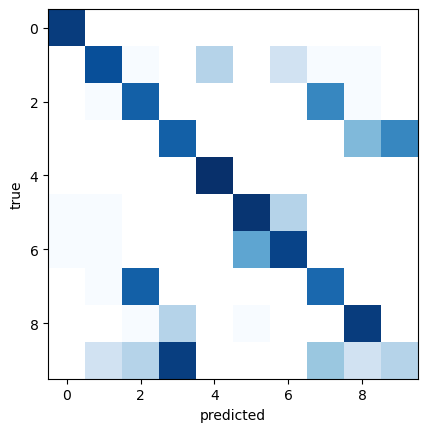

In [18]:
plt.imshow(np.log(confusion_matrix(Y_test, y_pred_test)), cmap='Blues', interpolation='nearest')
plt.ylabel('true')
plt.xlabel('predicted')